In [ ]:
pip install splitfolders

ERROR: Could not find a version that satisfies the requirement splitfolders (from versions: none)
ERROR: No matching distribution found for splitfolders


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import splitfolders
import skimage.io
import warnings
warnings.filterwarnings("ignore")

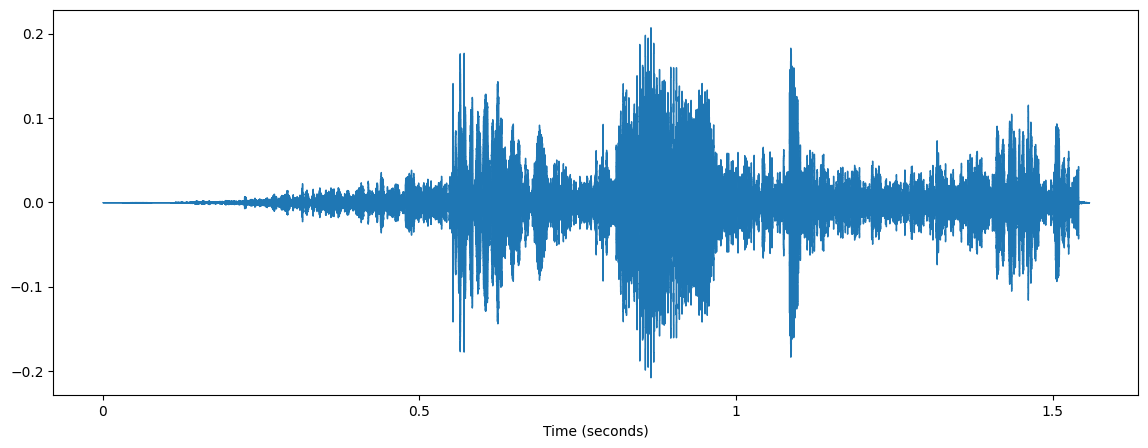

In [ ]:
filename = '/content/CAT.wav'
plt.figure(figsize=(14,5))
data , sample_rate = librosa.load(filename,sr = 32000)
# librosa.display.waveplot(data,sr = sample_rate)
librosa.display.waveshow(data, sr=sample_rate,x_axis='s')

ipd.Audio(filename)

In [ ]:
sample_rate

32000

In [ ]:
data,data.shape

(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.2921332e-06, -1.4127227e-05,  0.0000000e+00], dtype=float32),
 (34340,))

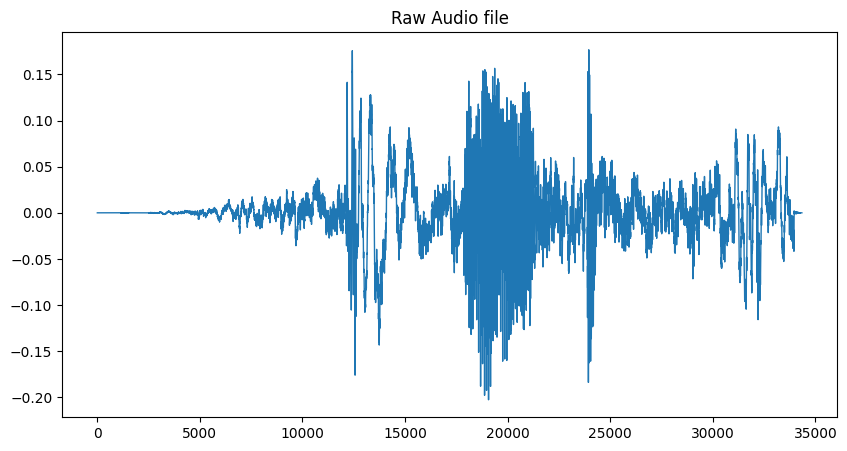

In [ ]:
pd.Series(data).plot(lw=1,
                     figsize = (10,5),
                     title = 'Raw Audio file')
plt.show()

In [ ]:
from scipy.io import wavfile as wav

In [ ]:
n_fft = 1024
hop_length = 320

window_type = 'hann'

spectogram_librosa = np.abs(librosa.stft(data,n_fft=n_fft,hop_length = hop_length,
                                         win_length = n_fft,
                                         window = window_type)) ** 2

In [ ]:
spectogram_librosa

array([[0.0000000e+00, 0.0000000e+00, 2.5121369e-23, ..., 8.8154197e-02,
        2.0964214e+01, 2.7265897e-01],
       [0.0000000e+00, 0.0000000e+00, 2.3437980e-23, ..., 3.5046501e+01,
        1.7494286e+01, 2.6265728e-01],
       [0.0000000e+00, 0.0000000e+00, 1.8989780e-23, ..., 2.1707436e+01,
        8.7859545e+00, 2.3045386e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 6.9278844e-23, ..., 1.2305898e-12,
        2.5937249e-12, 1.0268638e-10],
       [0.0000000e+00, 0.0000000e+00, 7.9739310e-23, ..., 8.4965476e-13,
        3.3752097e-13, 7.9696631e-11],
       [0.0000000e+00, 0.0000000e+00, 8.3498958e-23, ..., 5.7088496e-16,
        1.8755433e-13, 8.0857314e-11]], dtype=float32)

In [ ]:
# the shape of the spectogram
spectogram_librosa.shape

(513, 156)

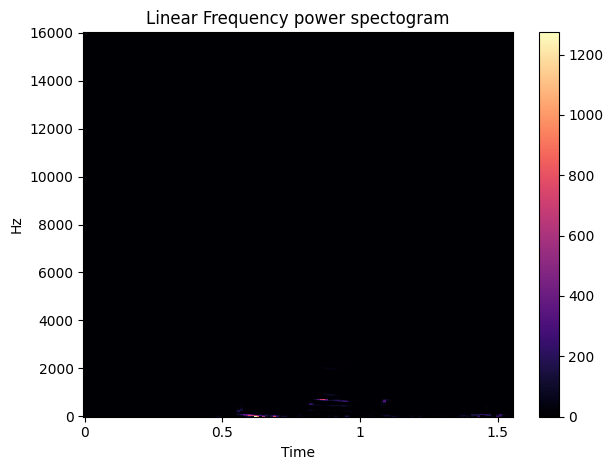

In [ ]:
librosa.display.specshow(spectogram_librosa,
                         sr = sample_rate,
                         x_axis = 'time',
                         y_axis = 'linear',
                         hop_length = hop_length)
plt.title("Linear Frequency power spectogram")

plt.colorbar()
plt.tight_layout()
plt.show()

Transforming the spectrogram output to a logarithmic scale by transforming the amplitude to decibels and frequency to a mel scale


The shape of mel spectrogram is:  (64, 156)


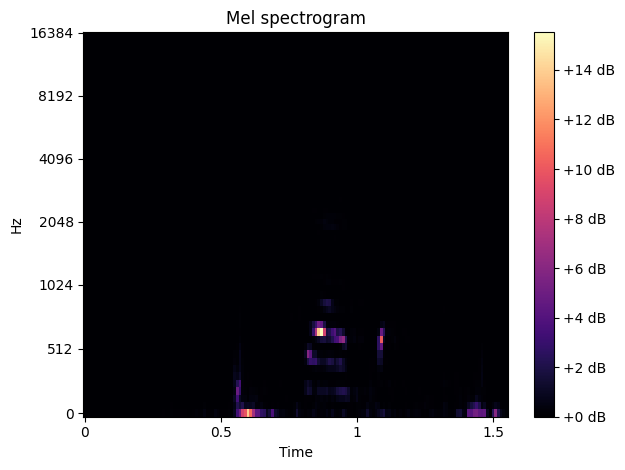

In [ ]:
mel_bins = 64 # Number of mel bands
fmin = 0
fmax= None
Mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sample_rate,
                                                 n_fft=n_fft,
                                                 hop_length=hop_length,
                                                 win_length=n_fft,
                                                 window=window_type,
                                                 n_mels = mel_bins,
                                                 power=2.0)


print("The shape of mel spectrogram is: ", Mel_spectrogram.shape)

librosa.display.specshow(Mel_spectrogram, sr=sample_rate,
                         x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
audio = '/content/drive/MyDrive/Cat vs bat'

In [ ]:
files = os.listdir(audio)

In [ ]:
files

['bat', 'cat']

In [ ]:
for i in files:
  print(i)

bat
cat


In [ ]:
def print_file(folder):
  files_in_folder = os.listdir(folder)
  for file_name in files_in_folder:
      if os.path.isfile(os.path.join(folder,file_name)):
        print(file_name)

In [ ]:
def features_extractor(audio):
    audio, sample_rate = librosa.load(audio, res_type='kaiser_fast')

    spectogram_librosa = np.abs(librosa.stft(data,n_fft=n_fft,hop_length = hop_length,
                                         win_length = n_fft,
                                         window = window_type)) ** 2

    return spectogram_librosa


In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])